In [21]:
import pandas as pd
from tensorflow.python.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import operator
from functools import reduce

In [22]:
#df=pd.read_csv("https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv")
#df.to_csv("credit_cards_dataset.csv")
df=pd.read_csv("credit_cards_dataset.csv")
df.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
df['BILL_AMT']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['PAY_AMT']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
print(df.columns)
#print(df.head())

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'BILL_AMT', 'PAY_AMT'],
      dtype='object')


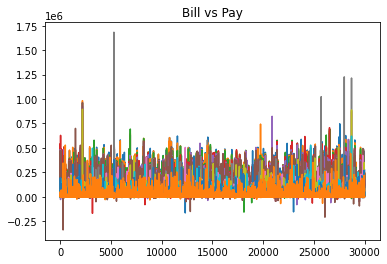

In [6]:
bill_amt=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
pay_amt=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
target=tf.Variable(df['default'])
plt.plot(bill_amt,label='Bill Amt')
plt.plot(pay_amt,label='Pay Amt')
plt.title('Bill vs Pay')
plt.show()

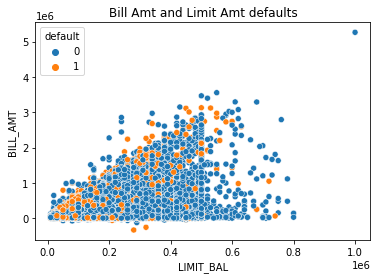

In [7]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT',hue='default', data=df)
plt.title("Bill Amt and Limit Amt defaults")
plt.show()

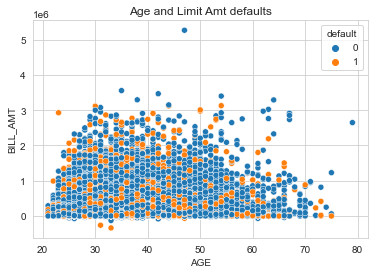

In [23]:
sns.scatterplot(x='AGE',y='BILL_AMT',hue='default', data=df)
plt.title("Age and Limit Amt defaults")
plt.show()


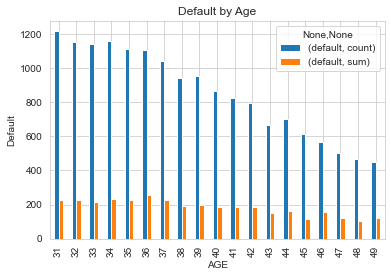

Defaults occur more frequently between the ages of 31 to 40


In [31]:
filter=(df['AGE']>30) & (df['AGE']<50) 
grouped=df[['AGE','default']][filter].groupby('AGE').agg(['count','sum'])
#print(grouped)
grouped.plot(kind='bar')
plt.title('Default by Age')
plt.ylabel('Default')
plt.show()
print("Defaults occur more frequently between the ages of 31 to 40")

In [16]:
NUMERIC=['LIMIT_BAL', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'BILL_AMT', 'PAY_AMT']

LABELS=['default']


nf_credit_amount = 250000
nf_payment_amount = 250000
nf_age = 60
nf_generic_factor = 7

X=df[NUMERIC]
sex_dummies=pd.get_dummies(df['SEX'],prefix='_sex')
education_dummies=pd.get_dummies(df['EDUCATION'],prefix='_edu')
marriage_dummies=pd.get_dummies(df['MARRIAGE'],prefix='_marriage')
X=pd.concat([X,sex_dummies],axis=1)
X=pd.concat([X,education_dummies],axis=1)
X=pd.concat([X,marriage_dummies],axis=1)
X['LIMIT_BAL']=X['LIMIT_BAL']/nf_credit_amount
X['BILL_AMT']=X['BILL_AMT']/nf_credit_amount
X['BILL_AMT1']=X['BILL_AMT1']/nf_credit_amount
X['BILL_AMT2']=X['BILL_AMT2']/nf_credit_amount
X['BILL_AMT3']=X['BILL_AMT3']/nf_credit_amount
X['BILL_AMT4']=X['BILL_AMT4']/nf_credit_amount
X['BILL_AMT5']=X['BILL_AMT5']/nf_credit_amount
X['BILL_AMT6']=X['BILL_AMT6']/nf_credit_amount

X['PAY_AMT']=X['PAY_AMT']/nf_payment_amount
X['PAY_AMT1']=X['PAY_AMT1']/nf_payment_amount
X['PAY_AMT2']=X['PAY_AMT2']/nf_payment_amount
X['PAY_AMT3']=X['PAY_AMT3']/nf_payment_amount
X['PAY_AMT4']=X['PAY_AMT4']/nf_payment_amount
X['PAY_AMT5']=X['PAY_AMT5']/nf_payment_amount
X['PAY_AMT6']=X['PAY_AMT6']/nf_payment_amount

X['AGE']=X['AGE']/nf_age

X['DEBT_RATIO']=(X['BILL_AMT']-X['PAY_AMT'])/X['LIMIT_BAL']
y=df[LABELS]

#print(X.head())
#print(y)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


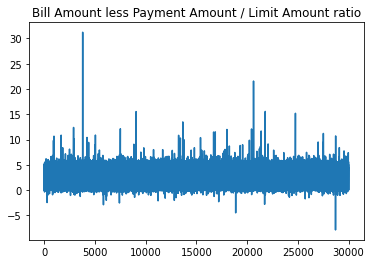

debt ratio above 5 represent risk. Banks should consult borrowers at this point.


In [18]:
X['DEBT_RATIO'].plot()
plt.title('Bill Amount less Payment Amount / Limit Amount ratio')
plt.show()
print('debt ratio above 5 represent risk. Banks should consult borrowers at this point.')

In [19]:
model = Sequential()


input_size=len(X.columns)
model.add(Dense(24,activation='sigmoid', input_shape=(input_size,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))


model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)
print(model.summary())
predictionResults=model.predict(X_test)




Instructions for updating:
Use tf.cast instead.
Epoch 1/10
21000/21000 [==============================] - 1s 46us/step - loss: 4.1988 - accuracy: 0.5960
Epoch 2/10
21000/21000 [==============================] - 1s 30us/step - loss: 0.4617 - accuracy: 0.8110
Epoch 3/10
21000/21000 [==============================] - 1s 31us/step - loss: 0.4582 - accuracy: 0.8129
Epoch 4/10
21000/21000 [==============================] - 1s 33us/step - loss: 0.4481 - accuracy: 0.8150
Epoch 5/10
21000/21000 [==============================] - 1s 30us/step - loss: 0.4437 - accuracy: 0.8173
Epoch 6/10
21000/21000 [==============================] - 1s 34us/step - loss: 0.4411 - accuracy: 0.8187
Epoch 7/10
21000/21000 [==============================] - 1s 31us/step - loss: 0.4415 - accuracy: 0.8193
Epoch 8/10
21000/21000 [==============================] - 1s 30us/step - loss: 0.4397 - accuracy: 0.8167
Epoch 9/10
21000/21000 [==============================] - 1s 31us/step - loss: 0.4366 - accuracy: 0.8209
Epoch 1

prediction 0 is nondefault 1 is default


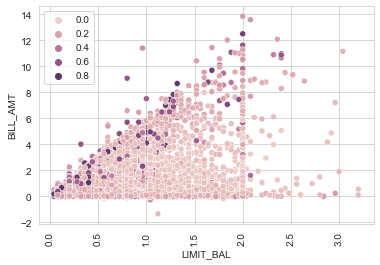

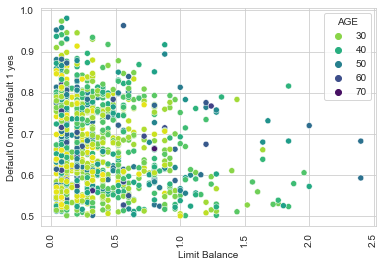

30 to 40 year credit card holder have a higher probability of default


In [20]:
#sns.color_palette("YlOrBr", as_cmap=True)
sns.set_style("whitegrid")

#predictionResults=reduce(operator.concat, predictionResults)
print("prediction 0 is nondefault 1 is default")
pred= predictionResults.flatten()
hue=pred
#print(hue)
#print(np.sum(hue))
sns.scatterplot(x=X_test['LIMIT_BAL'],y=X_test['BILL_AMT'],hue=hue)
plt.xticks(rotation=90)
plt.show()

filter=pred>.5
#palette="YlOrBr"
sns.scatterplot(y=pred[filter],x=X_test[filter]['LIMIT_BAL'],hue=X_test[filter]['AGE']*nf_age, palette="viridis_r")
plt.xticks(rotation=90)
plt.ylabel('Default 0 none Default 1 yes')
plt.xlabel('Limit Balance')
plt.show()

print("30 to 40 year credit card holder have a higher probability of default")